## 11. Hypothesis Testing and p-values

Suppose we partition the parameters space $\Theta$ into two disjoint sets $\Theta_0$ and $\Theta_1$ and we wish to test

$$
H_0: \theta \in \Theta_0
\quad \text{versus} \quad
H_1: \theta \in \Theta_1
$$

We call $H_0$ the **null hypothesis** and $H_1$ the **alternative hypothesis**.

Let $X$ be a random variable and let $\mathcal{X}$ be the range of $X$.  We test a hypothesis by finding an appropriate subset of outcomes $R \subset \mathcal{X}$ called the **rejection region**.

$$
\begin{align}
X \in R & \Longrightarrow  \text{reject } H_0 \\
X \notin R & \Longrightarrow  \text{retain (do not reject) } H_0
\end{align}
$$

Usually the rejection region is of form

$$ R = \bigg\{x: T(x) > c \bigg\}$$

where $T$ is a **test statistic** and $c$ is a **critical value**.  The problem in hypothesis testing is to find an appropriate test statistic $T$ and and appropriate cutoff value $c$.

|            | Retain Null   | Reject Null  |
|------------|---------------|--------------|    
|$H_0$ true  | $\checkmark$  | Type I error |
|$H_1$ true  | Type II error | $\checkmark$ |

The **power function** of a test with rejection region $R$ is defined by

$$\beta(\theta) = \mathbb{P}_\theta(X \in R)$$

The **size** of a test is defined to be

$$\alpha = \sup_{\theta \in \Theta_0} \beta(\theta)$$

A test is said to have **level $\alpha$** if its size is less than or equal to $\alpha$.

- A hypothesis of the form $\theta = \theta_0$ is called a **simple hypothesis**.
- A hypothesis of the form $\theta > \theta_0$ or $\theta < \theta_0$ is called a **composite hypothesis**.
- A test of the form $H_0 : \theta = \theta_0$ versus $H_1 : \theta \neq \theta_0$ is called a **two-sided test**.
- A test of the form $H_0 : \theta \leq \theta_0$ versus $H_1: \theta > \theta_0$ or $H_0: \theta \geq \theta_0$ versus $H_1: \theta < \theta_0$ is called a **one-sided test**.

The most common tests are two-sided.

Finding most powerful tests is hard and, in many cases, most powerful tests don't even exist.  We will just consider three widely used tests: the Wald test, the $\chi^2$ test, and the permutation test.  A fourth test, the likelihood ratio test, is discussed in the appendix.

### 11.1 The Wald Test

In statistics, the Wald test (named after Abraham Wald) assesses constraints on statistical parameters based on the weighted distance between the unrestricted estimate and its hypothesized value under the null hypothesis, where the weight is the precision of the estimate. Intuitively, the larger this weighted distance, the less likely it is that the constraint is true. While the finite sample distributions of Wald tests are generally unknown, it has an asymptotic $\chi^2$-distribution under the null hypothesis, a fact that can be used to determine statistical significance.

Under the Wald test, the estimated $\hat{\theta}$ that was found as the maximizing argument of the unconstrained likelihood function is compared with a hypothesized value $\theta _{0}$. In particular, the squared difference $\displaystyle{\hat{\theta}-\theta _{0}}$ is weighted by the curvature of the log-likelihood function.

Consider testing

$$ H_0: \theta = \theta_0
\quad \text{versus} \quad
H_1: \theta \neq \theta_0$$

Assume that $\hat{\theta}$ is asymptotically Normal:

$$ \frac{\sqrt{n}(\hat{\theta} - \theta_0)}{\hat{\text{se}}} \leadsto N(0, 1) $$

Test on a single parameter, the size $\alpha$ **Wald test** is: reject $H_0$ when $|W| > z_{\alpha/2}$, where

$$ W = \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}}$$

**Theorem 11.4**.  Asymptotically, the Wald test has size $\alpha$, that is,

$$ \mathbb{P}_{\theta_0} \left(|W| > z_{\alpha/2} \right) \rightarrow \alpha$$

as $n \rightarrow \infty$.

**Proof**.  Under $\theta = \theta_0$, $(\hat{\theta} - \theta) / \text{se} \leadsto N(0, 1)$, so the probability of rejecting when the null hypothesis $\theta = \theta_0$ is true is

$$
\begin{align}
\mathbb{P}_{\theta_0}(|W| > z_{\alpha / 2}) &= \mathbb{P}_{\theta_0} \left(\frac{|\hat{\theta} - \theta_0|}{\hat{\text{se}}} > z_{\alpha/2} \right) \\
& \rightarrow \mathbb{P}_{\theta_0}(| N(0, 1) | > z_{\alpha/2}) \\
& = \alpha
\end{align}
$$

Most texts define the Wald test with the standard error computed at $\theta = \theta_0$ rather than at the estimated value $\hat{\theta}$.  Both versions are valid.

**Theorem 11.6**.  Suppose that the true value of $\theta$ is $\theta_* \neq \theta_0$.  The power $\beta(\theta_*)$, the probability of correctly rejecting the null hypothesis, is given (approximately) by

$$ 1 - \Phi \left(\frac{\theta_0 - \theta_*}{\hat{\text{se}}} + z_{\alpha/2} \right) + \Phi \left(\frac{\theta_0 - \theta_*}{\hat{\text{se}}} - z_{\alpha/2} \right) $$

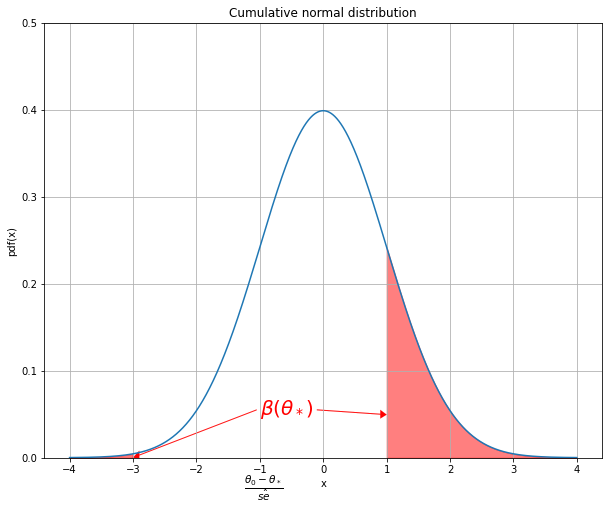

In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 8))
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,-3,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='r')
px2=np.arange(1,4,0.01)
ax.fill_between(px2,norm.pdf(px2),alpha=0.5, color='r')
# for text
ax.text(-1,0.05, r'$\beta(\theta_*)$', fontsize=20, color='r')
ax.arrow(-0.1, 0.055, dx=1.0, dy=-0.005, color='r', head_width=0.01,head_length=0.1, linewidth=0.1)
ax.arrow(-1.05, 0.055, dx=-1.85, dy=-0.052, color='r', head_width=0.01,head_length=0.1, linewidth=0.1)
ax.text(-1.25,-0.04, r'$ \frac{\theta_0-\theta_*}{\hat{se}} $', fontsize=15)
plt.show()

**Theorem 11.10**.  The size $\alpha$ Wald test rejects $H_0: \theta = \theta_0$ versus $H_1: \theta \neq \theta_0$ if and only if $\theta_0 \notin C$ where

$$ C = \left(\hat{\theta} - \hat{\text{se}} z_{\alpha/2}, \; \hat{\theta} + \hat{\text{se}} z_{\alpha / 2} \right) $$

Thus, testing the hypothesis is equivalent to checking whether the null value is in the confidence interval.

### 11.2 p-values

Suppose that for every $\alpha \in (0, 1)$ we have a size $\alpha$ test with rejection region $R_\alpha$.  Then,

$$ \text{p-value} = \inf \Big\{ \alpha : T(X^n) \in R_\alpha \Big\} $$

That is, the p-value is the smallest level at which we can reject $H_0$.

Informally, the p-value is a measure of the evidence against $H_0$: the smaller the p-value, the stronger the evidence against $H_0$.  Typically, researchers use the following evidence scale:

| p-value    | evidence                            |
|------------|-------------------------------------|
| under 1%   | very strong evidence against $H_0$  |
| 1% to 5%   | strong evidence against $H_0$       |
| 5% to 10%  | weak evidence against $H_0$         |
| over 10%   | little or no evidence against $H_0$ |

**Warning**: a large p-value is not strong evidence in favor of $H_0$. A large p-value can occur for two reasons:
- $H_0$ is true, or
- $H_0$ is false but the test has low power

**The p-value is not the probability that the null hypothesis is true**.  We discuss quantities like $\mathbb{P}(H_0 | \text{Data})$ in the chapter on Bayesian inference.

**Theorem 11.12**.  Suppose that the size $\alpha$ test is of the form

$$ \text{reject } H_0 \text{ if and only if } T(X^n) \geq c_\alpha$$

Then,

$$ \text{p-value} = \sup_{\theta \in \Theta_0} \mathbb{P}_\theta \left(T(X^n) \geq T(x^n) \right)$$

In words, the p-value is the probability (under $H_0$) of observing a value of the test statistic as or more extreme than what was actually observed.

For a Wald test, $W$ has an approximate $N(0, 1)$ distribution under $H_0$.  Hence, the p-value is

$$ \text{p-value} \approx \mathbb{P}(|Z| > |w|) = 2\mathbb{P}(Z < -|w|) = 2 \Phi(Z < -|w|) $$

where $Z \sim N(0, 1)$ and $w = (\hat{\theta} - \theta_0) / \hat{\text{se}}$ is the observed value of the test statistic.

**Theorem 11.13**. If the test statistic has a continuous distribution, then under $H_0: \theta = \theta_0$ the p-value has an $\text{Uniform}(0, 1)$ distribution.

### 11.3 The $\chi^2$ distribution

Let $Z_1, \dots, Z_k$ be independent, standard normals. Let $V = \sum_{i=1}^k Z_i^2$.  Then we say that $V$ has a $\chi^2$ distribution with $k$ degrees of freedom, written $V \sim \chi^2_k$.  The probability density of $V$ is

$$ f(v) = \frac{v^{(k/2) - 1}e^{-v/2}}{2^{k/2} \Gamma(k / 2)} $$

for $v > 0$.  It can be shown that $\mathbb{E}(V) = k$ and $\mathbb{V}(k) = 2k$.  We define the upper $\alpha$ quantile $\chi^2_{k, \alpha} = F^{-1}(1 - alpha)$ where $F$ is the CDF.  That is, $\mathbb{P}(\chi^2_k > \chi^2_{k, \alpha}) = \alpha$.

### 11.4 Pearson's $\chi^2$ Test for Multinomial Data

Recall that $X = (X_1, \dots, X_n)$ has a multinomial distribution if

$$ f(x_1, \dots, x_k; p) = \begin{pmatrix}
n \\
x_1 \dots x_k
\end{pmatrix} p_1^{x_1} \dots p_k^{x_k}$$

where

$$
\begin{pmatrix}
n \\
x_1 \dots x_k
\end{pmatrix} = 
\frac{n!}{x_1! \dots x_k!}
$$

The MLE of $p$ is $\hat{p} = (\hat{p_1}, \dots, \hat{p_k}) = \left(X_1 / n, \dots, X_k / n\right)$.

Let $(p_{01}, \dots, p_{0k})$ be some fixed test of probabilities and suppose we want to test

$$ H_0: (p_1, \dots, p_k) = (p_{01}, \dots, p_{0k})
\quad \text{versus} \quad
H_1: (p_1, \dots, p_k) \neq (p_{01}, \dots, p_{0k})$$

**Pearson's $\chi^2$ statistic** is

$$ T = \sum_{j=1}^k \frac{(X_j - np_{0j})^2}{np_{0j}} = \sum_{j=1}^k \frac{(O_j - E_j)^2}{E_j}$$

where $O_j = X_j$ is the observed data and $E_j = \mathbb{E}(X_j) = np_{0j}$ is the expected value of $X_j$ under $H_0$.

**Theorem 11.15**.  Under $H_0$, $T \leadsto \chi^2_{k - 1}$.  Hence the test:  reject $H_0$ if $T > \chi^2_{k - 1, \alpha}$ has asymptotic level $\alpha$.  The p-value is $\mathbb{P}(\chi^2_k > t)$ where $t$ is the observed value of the test statistic.

### 11.5 The Permutation Test

Suppose that $X_1, \dots, X_m \sim F_X$ and $Y_1, \dots, Y_n \sim F_Y$ are two independent samples and $H_0$ is the hypothesis that both samples are identically distributed.  More precisely we are testing

$$ H_0: F_X = F_Y \quad \text{versus} \quad F_1: F_X \neq F_Y$$

Let $T(x_1, \dots, x_m, y_1, \dots, y_n)$ be some test statistic, for example

$$ T(X_1, \dots, X_m, Y_1, \dots, Y_n) = | \overline{X}_m - \overline{Y}_n |$$

Let $N = m + n$ and consider forming all $N!$ permutations of the data $X_1, \dots, X_m, Y_1, \dots, Y_n$.  For exach permutation, compute the test statistic $T$.  Denote these values by $T_1, \dots, T_{N!}$.  Under the null hypothesis, each of these values is equally likely.  The distribution $P_0$ that puts mass $1 / N!$ on each $T_j$ is called the **permutation distribution** of $T$.  Let $t_\text{obs}$ be the observed value of the test statistic.  Assuming we reject when $T$ is large, the p-value is

$$ \text{p-value} = \mathbb{P}_0(T > t_\text{obs}) = \frac{1}{N!} \sum_{i=1}^{N!} I(T_j > t_\text{obs}) $$

Usually it is not practical to evaluate all $N!$ permutations.  We can approximate the p-value by sampling randomly from the set of permutations.  The fraction of times $T > t_\text{obs}$ among these samples approximates the p-value.

**Algorithm for the Permutation Test**

1. Compute the observed value of the test statistic $t_\text{obs} = T(X_1, \dots, X_m, Y_1, \dots, Y_n)$.

2. Randomly permute the data. Compute the statistic again using the permuted data.

3. Repeat the previous step $B$ times and let $T_1, \dots, T_B$ denote the resulting values.

4. The approximate p-value is

$$ \frac{1}{B} \sum_{i=1}^B I(T_j > t_\text{obs}) $$

In large samples, the permutation test usually gives similar results to a test that is based on large sample theory.  The permutation test is thus most useful for small samples.

### 11.6 Multiple Testing

Consider $m$ hypothesis tests:

$$ H_{0i} \quad \text{versus} \quad H_{1i}, \quad i = 1, \dots, m$$

and let $P_1, \dots, P_m$ denote $m$ p-values for these tests.

**The Bonferroni Method**:  Given p-values $P_1, \dots, P_m$, reject null hypothesis $H_{0i}$ if $P_i < \alpha / m$.

**Theorem 11.19**.  Using the Bonferroni method, the probability of falsely rejecting any null hypothesis is less than or equal to $\alpha$.

**Proof**.  Let $R$ be the event that at least one null hypothesis is falsely rejected.  Let $R_i$ be the event that the $i$-th null hypothesis is falsely rejected.  Recall that if $A_1, \dots, A_k$ are events then $\mathbb{P} \left( \bigcup_{i=1}^k A_i \right) \leq \sum_{i=1}^k \mathbb{P}(A_i)$.  Hence,

$$\mathbb{P}(R) = \mathbb{P}\left( \bigcup_{i=1}^k R_i \right) \leq \sum_{i=1}^k \mathbb{P}(R_i) = \sum_{i=1}^k \frac{\alpha}{m} = \alpha$$

The Bonferroni Method is very conservative because it is trying to make it unlikely that you would make even one false rejection.  Sometimes, a more reasonable idea is to control the **false discovery rate** (FDR) which is defined as the mean number of false rejections divided by the number of rejections.

|           |  $H_0$ not rejected | $H_0$ rejected  | Total |
|-----------|---------------------|-----------------|-------|
|$H_0$ true | $U$                 | $V$             | $m_0$ |
|$H_0$ false| $T$                 | $S$             | $m_1$ |
|Total      | $m - R$             | $R$             | $m$   |

Define the **false discovery proportion** (FDP):

$$ \text{FDP} = \begin{cases}
V / R & \text{if } R > 0\\
0     & \text{if}  R = 0
\end{cases}$$

The FDP is the proportion of rejections that are incorrect.  Next define $\text{FDR} = \mathbb{E}(\text{FDP})$.

**The Benjamini-Hochberg (BH) Method**

1. Let $P_{(1)} < \cdots < P_{(m)}$ denote the ordered p-values.

2. Define

$$\ell_i = \frac{i \alpha}{C_m m},
\quad \text{and} \quad
R = \max \bigg\{ i: P_{(i)} < \ell_i \bigg\}$$

where $C_m$ is defined to be 1 if the p-values are independent and $C_m = \sum_{i=1}^m (1/i)$ otherwise.

3. Let $t = P_{(R)}$; we call $t$ the **BH rejection threshold**.

4. Reject all null hypothesis $H_{0i}$ for which $P_i \leq t$.

**Theorem 11.21 (Benjamini and Hocheberg)**.  If the procedure above is applied, then regardless of how many nulls are true and regardless of the distribution of p-values when the null hypothesis is false,

$$\text{FDR} = \mathbb{E}(\text{FDP}) \leq \frac{m_0}{m} \alpha \leq \alpha $$.

### 11.7 Technical Appendix

#### 11.7.1 The Neyman-Pearson Lemma

**Theorem 11.23 (Neyman-Pearson)**.  Suppose we test $H_0: \theta = \theta_0$ versus $H_1: \theta = \theta_1$. Let

$$ T = \frac{\mathcal{L}(\theta_1)}{\mathcal{L}(\theta_0)} = \frac{\prod_{i=1}^n f(x_i; \theta_1)}{\prod_{i=1}^n f(x_i; \theta_0)}$$

Suppose we reject $H_0$ when $T > k$.  If we choose $k$ so that $\mathbb{P}_{\theta_0}(T > k) = \alpha$ then this test is the most powerful, size $\alpha$ test.  That is, among all tests with size $\alpha$, this test maximizes power $\beta(\theta_1)$.

#### 11.7.2 Power of the Wald Test

**Proof of Theorem 11.6**.  

Let $Z \sim N(0, 1)$.  Then,

$$
\begin{align}
\text{Power} &= \beta(\theta_*) \\
&= \mathbb{P}_{\theta_*}(\text{Reject } H_0) \\
&= \mathbb{P}_{\theta_*}\left( \frac{|\hat{\theta} - \theta_0|}{\hat{\text{se}}} > z_{\alpha/2} \right) \\
&= \mathbb{P}_{\theta_*}\left( \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} > z_{\alpha/2} \right) 
+ \mathbb{P}_{\theta_*}\left( \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} < -z_{\alpha/2} \right) \\
&= \mathbb{P}_{\theta_*}(\hat{\theta} > \theta_0 + \hat{\text{se}} z_{\alpha/2})
+ \mathbb{P}_{\theta_*}(\hat{\theta} < \theta_0 - \hat{\text{se}} z_{\alpha/2}) \\
&= \mathbb{P}_{\theta_*}\left( \frac{\hat{\theta} - \theta_*}{\hat{\text{se}}} > \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} + z_{\alpha/2} \right) 
+ \mathbb{P}_{\theta_*}\left( \frac{\hat{\theta} - \theta_*}{\hat{\text{se}}} < \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} - z_{\alpha/2} \right) \\
& \approx \mathbb{P}\left(Z > \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} + z_{\alpha/2} \right) 
+ \mathbb{P}\left(Z < \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} - z_{\alpha/2} \right) \\
&= 1 - \Phi\left( \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} + z_{\alpha/2} \right) 
+ \Phi\left( \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} - z_{\alpha/2} \right)
\end{align}
$$

#### 11.7.3 The t-test

To test $H_0: \mu = \mu_0$ where $\mu$ is the mean, we can use the Wald test. When the data is assumed to be Normal and the sample size is small, it is common instead to use the **t-test**. A random variable $T$ as a *t-distribution with $k$ degrees of freedom* if it has density

$$ f(t) = \frac{\Gamma\left(\frac{k+1}{2}\right)}{\sqrt{k \pi} \Gamma\left(\frac{k}{2}\right) \left(1 + \frac{t^2}{k}\right)^{(k+1)/2}}$$

When the degrees of freedom $k \rightarrow \infty$, this tends to a Normal distribution.  When $k = 1$ it reduces to a Cauchy distribution.

Let $X_1, \dots, X_n \sim N(\mu, \sigma^2)$ where $\theta = (\mu, \sigma^2)$ are both unknown.  Suppose we want to test $\mu = \mu_0$ versus $\mu \neq \mu_0$.  Let

$$T = \frac{\sqrt{n}(\overline{X}_n - \mu_0)}{S_n}$$

where $S_n^2$ is the sample variance. For large samples $T \approx N(0, 1)$ under $H_0$.  The exact distribution of $T$ under $H_0$ is $t_{n-1}$.  Hence if we reject when $|T| > t_{n-1, \alpha/2}$ then we get a size $\alpha$ test.

#### 11.7.4 The Likelihood Ratio Test

Let $\theta = (\theta_1, \dots, \theta_q, \theta_{q+1}, \dots, \theta_r)$ and suppose that $\Theta_0$ consists of all parameter values $\theta$ such that $(\theta_{q+1}, \dots, \theta_r) = (\theta_{0, q+1}, \dots, \theta_{0, r})$.

Define the **likelihood ratio statistic** by

$$ \lambda 
= 2 \log \left(  \frac{\sup_{\theta \in \Theta} \mathcal{L}(\theta)}{\sup_{\theta \in \Theta_0} \mathcal{L}(\theta)} \right) 
= 2 \log \left(  \frac{\mathcal{L}(\hat{\theta})}{\mathcal{L}(\hat{\theta_0})} \right) $$

where $\hat{\theta}$ is the MLE and $\hat{\theta_0}$ is the MLE when $\theta$ is restricted to lie in $\Theta_0$.  

The **likelihood ratio test** is: reject $H_0$ when $\lambda(x^n) > \chi^2_{r-q, \alpha}$.

**Theorem 11.25**.  Under $H_0$,

$$ 2 \log \lambda (x^n) \overset{d}{\leadsto} \chi^2_{r - q}$$

Hence, asymptotically, the LR test level is $\alpha$.

### 11.9 Exercises

**Exercise 11.9.1**.  Prove Theorem 11.13.



If the test statistic has a continuous distribution, then under $H_0: \theta = \theta_0$ the p-value has an $\text{Uniform}(0, 1)$ distribution.

**Solution**.  Let $T$ be the test statistic, and $F_T$ be its CDF under $H_0$.  Then

$$ F_\text{p-value}(p) = \mathbb{P}(\text{p-value} < p) = \mathbb{P}(F(T) < p) = \mathbb{P}(T < F^{-1}(p)) = F(F^{-1}(p)) = p$$

so the CDF for the p-value is the same as the CDF for the $\text{Uniform}(0, 1)$ distribution, therefore the p-value follows a $\text{Uniform}(0, 1)$ distribution.

**Exercise 11.9.2**.  Prove Theorem 11.10.

The size $\alpha$ Wald test rejects $H_0: \theta = \theta_0$ versus $H_1: \theta \neq \theta_0$ if and only if $\theta_0 \notin C$ where

$$ C = \left(\hat{\theta} - \hat{\text{se}} z_{\alpha/2}, \; \hat{\theta} + \hat{\text{se}} z_{\alpha / 2} \right) $$

**Solution**.

$\theta_0 \in C$ if and only if

$$
\hat{\theta} - \hat{\text{se}} z_{\alpha/2} < \theta_0 < \hat{\theta} + \hat{\text{se}} z_{\alpha/2} \\
\frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} - z_{\alpha/2} < 0 < \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} +  z_{\alpha/2} \\
- z_{\alpha/2} < \frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} < z_{\alpha/2} \\
|Z| > z_{\alpha/2}
$$

which is the criteria for the Wald test.

**Exercise 11.9.3**.  Let $X_1, \dots, X_n \sim \text{Uniform}(0, \theta)$ and let $Y = \max \{ X_1, \dots, X_n \}$.  We want to test

$$ H_0: \theta = 1/2 \quad \text{versus} \quad H_1: \theta > 1/2 $$

The Wald test is not appropriate since $Y$ does not converge to a Normal.  Suppose we decide to test this hypothesis by rejecting $H_0$ when $Y > c$.

**(a)** Find the power function.

**(b)** What choice of $c$ will make the size of the test 0.05?

**(c)** In a sample of size $n = 20$ with $Y = 0.48$ what is the p-value? What conclusion about $H_0$ would you make?

**(d)** In a sample of size $n = 20$ with $Y = 0.52$ what is the p-value? What conclusion about $H_0$ would you make?

**Solution**

**(a)** The power function for this test is

$$\beta(\theta) = \mathbb{P}_\theta(X \in R) = \mathbb{P}_\theta(Y > c) = 1 - \mathbb{P}_\theta(Y \leq c) = 1 - \prod_{i=1}^n \mathbb{P}_\theta(X_i \leq c) = 1 - \left(\text{clip}\left(\frac{c}{\theta}\right)\right)^n$$

where we limit $c/\theta$ to the $[0, 1]$ interval, $$\text{clip}(t) = \begin{cases} 1 & \text{if } t > 1 \\ t & \text{if } 0 \leq t \leq 1 \\ 0 & \text{otherwise} \end{cases}$$

**(b)** There is only one value in $\Theta_0$, $\theta = 1/2$.  The size of the test then is $\beta(1/2) = 1 - \left(\text{clip}\left(2c\right)\right)^n$.  Equating it to 0.05 and solving, we get $c = 0.5 \cdot 0.95^{1/n}$.

**(c)** The test has size $\alpha$ when $ 1 - \left(\text{clip}\left(2c\right)\right)^n = \alpha$, or $c = 0.5 \cdot (1 - \alpha)^{1/n}$.  The p-value occurs on the threshold of the rejection region, that is, the infimal $\alpha$ such that $Y > c$, so $Y > 0.5 \cdot (1 - \alpha)^{1/n}$, or $\alpha > 1 - (2Y)^n$.

For $n = 20$, $Y = 0.48$, that reduces to $\alpha > 1 - (2\cdot 0.48)^{20} \approx 0.557$.  This means that the test provides little or no evidence against $H_0$.

**(d)** For $n = 20$, $Y = 0.52$, the clipping function gets stuck at its maximum -- even for $\alpha = 0$ we get $Y > c = 0.05$, so the p-value is 0, and the test almost surely rejects the null hypothesis.  This is in agreement with the observation that, since $Y > \theta_0$, the maximum sample was generated with value greater than $\theta_0$, so it is certain that $\theta_* > \theta_0$.

**Exercise 11.9.4**. There is a theory that people can postpone their death until after an important event.  To test the theory, Phillips and King (1988) collected data on deaths around the Jewish holiday Passover.  Of 1919 deaths, 922 died the week before the holiday and 997 died the week after.  Think of this as a binomial and test the null hypothesis that $\theta = 1/2$.  Report and interpret the p-value.  Also construct a confidence interval for $\theta$.

Reference:
Philips, D.P and King, E.W. (1988).
*Death takes a holiday: Mortality surrounding major social occasions.*
The Lancet, 2, 728-732.

**Solution**.  Let the number of deaths be $X \sim \text{Binomial}(n, \theta)$, with $n = 1919$.  We have a measurement for $X = 922$, and we want to test the null hypothesis:

$$H_0:  \theta = 1/2 \quad \text{versus} \quad H_1: \theta \neq 1/2$$

The MLE is $\hat{\theta} = X / n = 922 / 1919$; the estimated standard error is $\sqrt{\hat{\theta}(1 - \hat{\theta})/n}$.  The Wald test statistic is $W = (\hat{\theta} - \theta_0) / \hat{\text{se}}$, and the p-value is $\mathbb{P}(|Z| > |W|) = 2(1 - \Phi(|W|))$. 

In [4]:
import math
from scipy.stats import norm

n = 1919
X = 922
theta_hat = 922 / 1919
se_hat = math.sqrt(theta_hat * (1 - theta_hat) / n)

z_05 = norm.ppf(0.975)
confidence_interval = (theta_hat - z_05 * se_hat, theta_hat + z_05 * se_hat)

w = (theta_hat - 0.5) / se_hat
p_value = 2 * (1 - norm.cdf(abs(w)))

print('Estimated theta: \t %.3f' % theta_hat)
print('Estimated SE: \t\t %.3f' % se_hat)
print('95%% confidence interval: (%.3f, %.3f)' % confidence_interval)
print('Wald statistic: \t %.3f' % w)
print('p-value: \t\t %.3f' % p_value)

Estimated theta: 	 0.480
Estimated SE: 		 0.011
95% confidence interval: (0.458, 0.503)
Wald statistic: 	 -1.713
p-value: 		 0.087


A 95% confidence interval can be built based on the estimated value for $\theta$ and its estimated standard error, from 45.8% to 50.3%.

The Wald test produces a p-value of 8.7%, which represents only weak evidence against the null hypothesis -- inconclusive results.

**Exercise 11.9.5**. In 1861, 10 essays appeared in the New Orleans Daily Crescent.  They were signed "Quintus Curtuis Snodgrass" and some people suspected they were actually written by Mark Twain.  To investigate this, we will investigate the proportion of three letter words found in an author's work.

From eight Twain essays we have:

$$ 
0.225 \quad 0.262 \quad 0.217 \quad 0.240 \quad 0.230 \quad 0.229 \quad 0.235 \quad 0.217
$$

From 10 Snodgrass essays we have:

$$
0.209 \quad 0.205 \quad 0.196 \quad 0.210 \quad 0.202 \quad 0.207 \quad 0.224 \quad 0.223 \quad 0.220 \quad 0.201
$$

(source: Rice xxxx)

**(a)** Perform a Wald test for equality of the means.  Use the nonparametric plug-in estimator. Report the p-value and a 95% confidence interval for the difference of means.  What do you conclude?

**(b)** Now use a permutation test to avoid the use of large sample methods.  What is your conclusion?

In [5]:
X = [0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217]
Y = [0.209, 0.205, 0.196, 0.210, 0.202, 0.207, 0.224, 0.223, 0.220, 0.201]

**Solution**.

**(a)**

In [7]:
import numpy as np
from scipy.stats import norm
from tqdm import notebook

X = np.array(X)
Y = np.array(Y)

x_hat = X.mean()
y_hat = Y.mean()

diff_hat = x_hat - y_hat
se_hat = np.sqrt(X.var(ddof=1)/len(X) + Y.var(ddof=1)/len(Y))

z_05 = norm.ppf(0.975)
confidence_interval = (diff_hat - z_05 * se_hat, diff_hat + z_05 * se_hat)

w = diff_hat / se_hat
p_value = 2 * (1 - norm.cdf(abs(w)))

print('Estimated difference of means:\t %.3f' % diff_hat)
print('Estimated SE: \t\t\t %.3f' % se_hat)
print('95%% confidence interval:\t (%.3f, %.3f)' % confidence_interval)
print('Wald statistic: \t\t %.3f' % w)
print('Wald test p-value: \t\t %.4f' % p_value)

Estimated difference of means:	 0.022
Estimated SE: 			 0.006
95% confidence interval:	 (0.010, 0.034)
Wald statistic: 		 3.704
Wald test p-value: 		 0.0002


Such a small p-value (0.02%) offers very strong evidence to reject the null hypothesis -- that is, that the series follow distributions with different means.  The writing styles are different according to this metric, even if the same writer is responsible for both.

**(b)**

In [8]:
# Permutation test using random shuffling

B = 1000000
full_series = np.concatenate([X, Y])
nx = len(X)
diff_boot_count = 0
for i in notebook.tqdm(range(B)):
    np.random.shuffle(full_series)
    xx, yy = full_series[:nx], full_series[nx:]
    diff_boot = xx.mean() - yy.mean()
    if diff_boot > diff_hat:
        diff_boot_count += 1
        
p_value_perm = diff_boot_count / B

print('Permutation test p-value: \t\t %.4f' % p_value_perm)

  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation test p-value: 		 0.0005


This small p-value (0.05%) also offers very strong evidence that the two samples come from series with different means.

**Exercise 11.9.6**.  Let $X_1, \dots, X_n \sim N(\theta, 1)$.  Consider testing

$$ H_0: \theta = 0 \quad \text{versus} \quad H_1: \theta = 1$$

Let the rejection region be $R = \{ x^n : T(x^n) > c \}$ where $T(x^n) = n^{-1} \sum_{i=1}^n X_i$.

**(a)** Find $c$ so that the test has size $\alpha$.

**(b)** Find the power under $H_1$, i.e., find $\beta(1)$.

**(c)** Show that $\beta(1) \rightarrow 1$ as $n \rightarrow \infty$.

**Solution**.

**(a)** Assume that $\hat{\theta}$ is asymptotically Normal:

$$ \frac{\sqrt{n}(\hat{\theta} - \theta_0)}{\hat{\text{se}}} \leadsto N(0, 1) $$

The size of the rejection region is

$$\mathbb{P}_{\theta = 0}(T > c) = \mathbb{P}_{\theta = 0}(\sqrt{n}T / 1 > \sqrt{n}c) = \mathbb{P}(Z > \sqrt{n} c) = 1 - \Phi(\sqrt{n}c)$$

If this value is $\alpha$, then 

$$
\begin{align}
\alpha &= 1 - \Phi(\sqrt{n}c) \\
\Phi(\sqrt{n}c) &= 1 - \alpha \\
\sqrt{n}c &= z_{\alpha} \\
c &= z_{\alpha} / \sqrt{n}
\end{align}
$$

**(b)** We have $\beta(1) = \mathbb{P}_{\theta = 1}(T > c) = \mathbb{\theta = 1}(\sqrt{n}(T - 1)/1 > \sqrt{n}(c - 1)) = \mathbb{P}(Z > \sqrt{n}(c - 1)) = 1 - \Phi(\sqrt{n}(c - 1)) = 1 - \Phi(z_\alpha - \sqrt{n})$

**(c)** As $n \rightarrow \infty$, $\beta(1) \rightarrow 1 - \Phi(-\infty) = 1$.

**Exercise 11.9.7**.  Let $\hat{\theta}$ be the MLE of a parameter theta and let $\hat{\text{se}} = \{ n I(\hat{\theta})\}^{-1/2}$ where $I(\hat{\theta})$ is the Fisher information.  Consider testing

$$H_0: \theta = \theta_0 \quad \text{versus} \quad H_1: \theta \neq \theta_0$$

Consider the Wald test with rejection region $R = \{ x^n: |Z| > z_{\alpha/2} \}$ where $Z = (\hat{\theta} - \theta_0) / \hat{\text{se}}$.  Let $\theta_1 > \theta_0$ be some alternative.  Show that $\beta(\theta_1) \rightarrow 1$.

**Solution**.

We have 

$$
\begin{align}
\beta(\theta_1) &= \mathbb{P}_{\theta_1}(|Z| > z_{\alpha/2}) \\
&= \mathbb{P}_{\theta_1}(Z > z_{\alpha/2}) + \mathbb{P}_{\theta_1}(Z < - z_{\alpha/2})\\
&= \mathbb{P}_{\theta_1}\left(\frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} > z_{\alpha/2}\right)
+ \mathbb{P}_{\theta_1}\left(\frac{\hat{\theta} - \theta_0}{\hat{\text{se}}} < -z_{\alpha/2}\right) \\
&= \mathbb{P}_{\theta_1}\left(\hat{\theta} > \hat{\text{se}} z_{\alpha/2} + \theta_0 \right)
+ \mathbb{P}_{\theta_1}\left(\hat{\theta} < -\hat{\text{se}} z_{\alpha/2} + \theta_0 \right) \\
&= \mathbb{P}_{\theta_1}\left(\frac{\hat{\theta} - \theta_1}{\hat{\text{se}}} >  z_{\alpha/2} + \frac{\theta_0 - \theta_1}{\hat{\text{se}}} \right)
+ \mathbb{P}_{\theta_1}\left(\frac{\hat{\theta} - \theta_1}{\hat{\text{se}}} <  -z_{\alpha/2} + \frac{\theta_0 - \theta_1}{\hat{\text{se}}} \right) \\
&= \mathbb{P}_{\theta_1}\left(W >  z_{\alpha/2} + \frac{\theta_0 - \theta_1}{\hat{\text{se}}} \right)
+ \mathbb{P}_{\theta_1}\left(W <  -z_{\alpha/2} + \frac{\theta_0 - \theta_1}{\hat{\text{se}}} \right) \\
& \geq \mathbb{P}_{\theta_1}\left(W >  z_{\alpha/2} + \frac{\theta_0 - \theta_1}{\hat{\text{se}}} \right)
\end{align}
$$

When $n\rightarrow\infty$, $\hat{\text{se}}\rightarrow 0$.  Since $\theta_1 > \theta_0$, the right hand side of the inequality goes to $-\infty$, and so the lower bound probability goes to 1.  Therefore $\beta(\theta_1) \rightarrow 1$.

**Exercise 11.9.8**.  Here are the number of elderly Jewish and Chinese women who died just before and after the Chinese Harvest Moon Festival.

| Week | Chinese | Jewish |
|------|---------|--------|
| -2   | 55      | 141    |
| -1   | 33      | 145    |
| 1    | 70      | 139    |
| 2    | 49      | 161    |

Compare the two mortality patterns.

**Solution**.

In [9]:
import pandas as pd

df = pd.DataFrame({
    'Chinese': [55, 33, 70, 49],
    'Jewish':  [141, 145, 139, 161]
}, index=[-2, -1, 1, 2])

Let's use a few different approaches.

First:  $\chi^2$ tests comparing, separately, Chinese and Jewish mortalities before and after the Chinese Harvest Moon Festival.

**Pearson's $\chi^2$ statistic** is

$$ T = \sum_{j=1}^k \frac{(X_j - np_{0j})^2}{np_{0j}} = \sum_{j=1}^k \frac{(O_j - E_j)^2}{E_j}$$

where $O_j = X_j$ is the observed data and $E_j = \mathbb{E}(X_j) = np_{0j}$ is the expected value of $X_j$ under $H_0$.

In [11]:
from scipy.stats import chi2

chinese_before = df['Chinese'].loc[-2:-1].sum()
chinese_after = df['Chinese'].loc[1:2].sum()

mu_chinese_hat = (chinese_before + chinese_after) / 2
t_pearson_chinese = (chinese_before - mu_chinese_hat)**2/mu_chinese_hat \
    + (chinese_after - mu_chinese_hat)**2/mu_chinese_hat

chi2_95 = chi2.ppf(0.95, 1)
p_value_chinese = 1 - chi2.cdf(t_pearson_chinese, 1)

print('Test statistic:\t\t\t\t%.3f ' % t_pearson_chinese)
print('95%% percentile chi squared with 1 df:\t%.3f' % chi2_95)
print('p-value for different distributions:\t%.3f' % p_value_chinese)

Test statistic:				4.643 
95% percentile chi squared with 1 df:	3.841
p-value for different distributions:	0.031


In [15]:
jewish_before = df['Jewish'].loc[-2:-1].sum()
jewish_after = df['Jewish'].loc[1:2].sum()

mu_jewish_hat = (jewish_before + jewish_after) / 2
t_pearson_jewish = (jewish_before - mu_jewish_hat)**2/mu_jewish_hat \
    + (jewish_after - mu_jewish_hat)**2/mu_jewish_hat

chi2_95 = chi2.ppf(0.95, 1)
p_value_jewish = 1 - chi2.cdf(t_pearson_jewish, 1)

print('Test statistic:\t\t\t\t%.3f ' % t_pearson_jewish)
print('95%% percentile chi squared with 1 df:\t%.3f' % chi2_95)
print('p-value for different distributions:\t%.3f' % p_value_jewish)

Test statistic:				0.334 
95% percentile chi squared with 1 df:	3.841
p-value for different distributions:	0.563


The $\chi^2$ test statistics for the Chinese population *do* suggest, with a p-value of 3.1%, that the mortality rates are distinct before and after the event, while the statistics for the Jewish population do not suggest so (with a no-evidence p-value of 56.3%).

Using the likelihood test to compare mortality in each group before and after the event:

| Group   | Chinese | Jewish |
|---------|---------|--------|
| Before  | 88      | 286    |
| After   | 119     | 300    |

Let $\theta = (\theta_1, \dots, \theta_q, \theta_{q+1}, \dots, \theta_r)$ and suppose that $\Theta_0$ consists of all parameter values $\theta$ such that $(\theta_{q+1}, \dots, \theta_r) = (\theta_{0, q+1}, \dots, \theta_{0, r})$.

Define the **likelihood ratio statistic** by

$$ \lambda 
= 2 \log \left(  \frac{\sup_{\theta \in \Theta} \mathcal{L}(\theta)}{\sup_{\theta \in \Theta_0} \mathcal{L}(\theta)} \right) 
= 2 \log \left(  \frac{\mathcal{L}(\hat{\theta})}{\mathcal{L}(\hat{\theta_0})} \right) $$

where $\hat{\theta}$ is the MLE and $\hat{\theta_0}$ is the MLE when $\theta$ is restricted to lie in $\Theta_0$.  

The **likelihood ratio test** is: reject $H_0$ when $\lambda(x^n) > \chi^2_{r-q, \alpha}$.


MLE under alternate hypothesis: $$\hat{\theta} = \left( \frac{88}{793}, \frac{119}{793}, \frac{286}{793}, \frac{300}{793} \right)$$

MLE under null hypothesis:  $$\hat{\theta_0} =\left( \frac{103.5}{793}, \frac{103.5}{793}, \frac{293}{793}, \frac{293}{793} \right)$$

Log-likelihood ratio statistic: 

$$ \lambda = 2 \log \left( \frac{\mathcal{L}(\hat{\theta})}{\mathcal{L}(\hat{\theta_0})} \right)
= 2 \left( 88 \log \frac{88}{103.5} + 119 \log \frac{119}{103.5} + 286 \log \frac{286}{293} + 300 \log \frac{300}{293} \right) \approx 2.497
$$

The 95% percentile value for the $\chi^2$ distribution with 1 degree of freedom is $\approx 3.841$, so the likelihood test does not reject the null hypothesis at this confidence level.  The p-value for this test is 0.114, suggesting little or no evidence that, for both groups, the mortality rates are distinct.

Finally, let's do 4 distinct sample binomial tests, one for each week:

In statistics, the binomial test is an exact test of the statistical significance of deviations from a theoretically expected distribution of observations into two categories.

The binomial test is useful to test hypotheses about the probability ($\pi$) of success:

$$\displaystyle H_{0}:\pi =\pi_{0}$$
where $\pi _{0}$ is a user-defined value between $0$ and $1$.

If in a sample of size $n$ there are $k$ successes, while we expect $\displaystyle n\pi_{0}$, the formula of the binomial distribution gives the probability of finding this value:

$$\displaystyle Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}$$
If the null hypothesis $H_{0}$ were correct, then the expected number of successes would be $\displaystyle n\pi _{0}$. We find our $p$-value for this test by considering the probability of seeing an outcome as, or more, extreme. For a one-tailed test, this is straightforward to calculate. Suppose that we want to test if $\displaystyle \pi <\pi _{0}$. Then our $p$-value would be,

$$\displaystyle p=\sum _{i=0}^{k}Pr(X=i)=\sum _{i=0}^{k}{\binom {n}{i}}p^{i}(1-p)^{n-i}$$
An analogous computation can be done if we're testing if $\displaystyle \pi >\pi _{0}$.

Calculating a $p$-value for a two-tailed test is slightly more complicated, since a binomial distribution isn't symmetric if $\displaystyle \pi _{0}\neq 0.5$. This means that we can't just double the $p$-value from the one-tailed test. Recall that we want to consider events that are as, or more, extreme then the one we've seen, so we should consider the probability that we would see an event that is as, or less, likely than $\displaystyle X=k$. Let $$\displaystyle {\mathcal {I}}=\{i:Pr(X=i)\leq Pr(X=k)\}$$ denote all such events. Then the two-tailed $p$-value is calculated as,

$$\displaystyle p=\sum _{i\in {\mathcal {I}}}Pr(X=i)=\sum _{i\in {\mathcal {I}}}{\binom {n}{i}}p^{i}(1-p)^{n-i}$$

*scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')*  
Perform a test that the probability of success is p. This is an exact, two-sided test of the null hypothesis that the probability of success in a Bernoulli experiment is p.  

x: int or array_like  
The number of successes, or if x has length 2, it is the number of successes and the number of failures.

In [16]:
import pandas as pd
from scipy.stats import binom_test

theta_week1 = 55 / (55 + 141)
theta_week2 = 33 / (33 + 145)
theta_week3 = 70 / (70 + 139)
theta_week4 = 49 / (49 + 161)

theta_null = (55 + 33 + 70 + 49) / (55 + 33 + 70 + 49 + 141 + 145 + 139 + 161)

p1 = binom_test(55, 55 + 141, theta_null, alternative="two-sided")
p2 = binom_test(33, 33 + 145, theta_null, alternative="two-sided")
p3 = binom_test(70, 70 + 139, theta_null, alternative="two-sided")
p4 = binom_test(49, 49 + 161, theta_null, alternative="two-sided")

results = pd.DataFrame({'p-value': [p1, p2, p3, p4]}, index=[-2, -1, 1, 2])
results

,p-value
-2,0.516380
-1,0.021061
1,0.017937
2,0.388072


The tests suggest that there *is* strong evidence for distinct mortality rates between the Chinese and Jewish populations on the weeks immediately preceding and following the event (p-values of 2.1% and 1.8%), but not in the 2 weeks before or after the event (p-values of 51.6% and 38.8%).

**Exercise 11.9.9**. A randomized, double-blind experiment was conducted to assess the effectiveness of several drugs for reducing post-operative nausea.  The data are as follows.

|                        | Number of patients | Incidents of Nausea |
|------------------------|--------------------|---------------------|
| Placebo                | 80                 | 45                  |
| Chlorpromazine         | 75                 | 26                  |
| Dimenhydrate           | 85                 | 52                  |
| Pentobarbital (100 mg) | 67                 | 35                  |
| Pentobarbital (150 mg) | 85                 | 37                  |

**(a)** Test each drug versus the placebo at the 5% level.  Also, report the estimated odds-ratios.  Summarize your findings.

**(b)** Use the Bonferroni and the FDR method to adjust for multiple testing.

**Solution**.

**(a)**

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import norm

df = pd.DataFrame({
    'Treatment': ['Placebo', 'Chlorpromazine', 'Dimenhydrate', 'Pentobarbital (100 mg)', 'Pentobarbital (150 mg)'],
    'Number of patients': [80, 75, 85, 67, 85],
    'Incidents of Nausea': [45, 26, 52, 35, 37]
})
df

,Treatment,Number of patients,Incidents of Nausea
0,Placebo,80,45
1,Chlorpromazine,75,26
2,Dimenhydrate,85,52
3,Pentobarbital (100 mg),67,35
4,Pentobarbital (150 mg),85,37


In [18]:
df['p_hat'] = df['Incidents of Nausea'] / df['Number of patients']
df['variance'] = df['p_hat'] * (1 - df['p_hat']) / df['Number of patients']
df

,Treatment,Number of patients,Incidents of Nausea,p_hat,variance
0,Placebo,80,45,0.562500,0.003076
1,Chlorpromazine,75,26,0.346667,0.003020
2,Dimenhydrate,85,52,0.611765,0.002794
3,Pentobarbital (100 mg),67,35,0.522388,0.003724
4,Pentobarbital (150 mg),85,37,0.435294,0.002892


In [19]:
p_hat_placebo = df[df['Treatment'] == 'Placebo']['p_hat'][0]
variance_placebo = df[df['Treatment'] == 'Placebo']['variance'][0]

# odds = affected / normal = p / (1 - p)
df['Odds'] = df['p_hat'] / (1 - df['p_hat'])

# odds ratio = odds_placebo / odds_treatment
df['Odds ratio'] = df[df['Treatment'] == 'Placebo']['Odds'][0] / df['Odds']

df['Wald statistic'] = (df['p_hat'] - p_hat_placebo) / np.sqrt(df['variance'] + variance_placebo)
df['p-value'] = 2 * (1 - norm.cdf(abs(df['Wald statistic'])))
df

,Treatment,Number of patients,Incidents of Nausea,p_hat,variance,Odds,Odds ratio,Wald statistic,p-value
0,Placebo,80,45,0.562500,0.003076,1.285714,1.000000,0.000000,1.000000
1,Chlorpromazine,75,26,0.346667,0.003020,0.530612,2.423077,-2.764364,0.005703
2,Dimenhydrate,85,52,0.611765,0.002794,1.575758,0.815934,0.642987,0.520232
3,Pentobarbital (100 mg),67,35,0.522388,0.003724,1.093750,1.175510,-0.486428,0.626664
4,Pentobarbital (150 mg),85,37,0.435294,0.002892,0.770833,1.667954,-1.646605,0.099639


In [20]:
df[['Treatment', 'Odds ratio', 'Wald statistic', 'p-value']][df['Treatment'] != 'Placebo']

,Treatment,Odds ratio,Wald statistic,p-value
1,Chlorpromazine,2.423077,-2.764364,0.005703
2,Dimenhydrate,0.815934,0.642987,0.520232
3,Pentobarbital (100 mg),1.175510,-0.486428,0.626664
4,Pentobarbital (150 mg),1.667954,-1.646605,0.099639


At the 5% significance level, only Chlorpromazine changes the Nausea incidence, with an odds ratio of 2.42.

**(b)** There are 4 tests, so the significance ratio for the Bonferroni method will be $0.05 / 4 = 0.0125$.  Again, only Chlorpromazine rejects the null hypothesis.

For the Benjamini-Hochfield method, the ordered p-values are $0.0057 < 0.0996 < 0.5202 < 0.6266$; $\ell_i = i \alpha / m = 0.0125 \cdot i$, and $R = \max \{ i : P_{(i)} < \ell_i \} = 1$, so the rejection threshold again only rejects the null hypothesis for the first treatment.

**Exercise 11.9.10**.  Let $X_1, \dots, X_n \sim \text{Poisson}(\lambda)$.

**(a)** Let $\lambda_0 > 0$. Find the size $\alpha$ Wald test for 

$$ H_0: \lambda = \lambda_0 \quad \text{versus} \quad H_1: \lambda \neq \lambda_0$$

**(b)** (Computer Experiment)  Let $\lambda_0 = 1$, $n = 20$ and $\alpha = 0.05$.  Simulate $X_1, \dots, X_n \sim \text{Poisson}(\lambda_0)$ and perform the Wald test.  Repeat many times and count how often you reject the null.  How close is the type I error rate to 0.05?

**Solution**.

**(a)**

$$
\begin{align}
\beta(\lambda_0) &= \mathbb{P}_{\lambda_0}\left( |W| > z_{\alpha/2} \right)  \\
&= \mathbb{P}_{\lambda_0}\left( \Bigg| \frac{\hat{\lambda} - \lambda_0}{\hat{\text{se}}} \Bigg| > z_{\alpha/2} \right)
\end{align}
$$

The MLE for the parameter is the mean of the data, $\hat{\lambda} = \overline{X}$, while the estimate of the SE is $\sqrt{1 / I_n(\hat{\lambda})} = 1 / \sqrt{n\overline{X}}$.  Replacing these, we get

$$
\mathbb{P}_{\lambda_0}\left( \big| (\overline{X} - \lambda_0)\sqrt{n \overline{X}} \big| > z_{\alpha/2} \right)
$$

**(b)**

In [21]:
import numpy as np
from scipy.stats import norm, poisson
from tqdm import notebook

lambda_0 = 1
n = 20
alpha = 0.05

z = norm.ppf(1 - alpha / 2)

In [22]:
# Perform process once
X = poisson.rvs(lambda_0, size=n)
lambda_hat = X.mean()
rejection = ((lambda_hat - lambda_0)**2) * (n * lambda_hat) > z**2
print('Rejection: ', rejection)

Rejection:  False


In [23]:
# Perform process many times
B = 1000000
num_rejections = 0
for i in notebook.tqdm(range(B)):
    X = poisson.rvs(lambda_0, size=n)
    lambda_hat = X.mean()
    if ((lambda_hat - lambda_0)**2) * (n * lambda_hat) > z**2:
        num_rejections += 1
        
fraction_rejections = num_rejections / B

print('Fraction of rejections: %.3f' % fraction_rejections)

  0%|          | 0/1000000 [00:00<?, ?it/s]

Fraction of rejections: 0.052


The measured fraction of rejections of the null hypothesis is $0.052$, which is very close to $\alpha = 0.05$.